In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

![]("1.png")

In [292]:
df = pd.read_csv("hawaii.csv")


In [293]:
df.columns

Index(['loan_type', 'property_type', 'purpose', 'occupancy', 'amount',
       'status', 'sex', 'income'],
      dtype='object')

In [294]:
df.head()

,loan_type,property_type,purpose,occupancy,amount,status,sex,income
0,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,396,Loan originated,Female,152.0
1,VA-guaranteed,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,662,Loan originated,Male,111.0
2,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,461,Loan originated,Female,138.0
3,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Not owner-occupied as a principal dwelling,345,Loan originated,Female,184.0
4,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Not owner-occupied as a principal dwelling,210,Application withdrawn by applicant,Female,99.0


In [295]:
df.columns

Index(['loan_type', 'property_type', 'purpose', 'occupancy', 'amount',
       'status', 'sex', 'income'],
      dtype='object')

In [296]:
for col in df.columns:
    print(f'-------{col}--------')
    print(df[col].value_counts())

-------loan_type--------
Conventional          32182
VA-guaranteed          8722
FHA-insured            2911
FSA/RHS-guaranteed     1053
Name: loan_type, dtype: int64
-------property_type--------
One-to-four family dwelling (other than manufactured housing)    44735
Multifamily dwelling                                               125
Manufactured housing                                                 8
Name: property_type, dtype: int64
-------purpose--------
Home purchase       21900
Refinancing         18960
Home improvement     4008
Name: purpose, dtype: int64
-------occupancy--------
Owner-occupied as a principal dwelling        36872
Not owner-occupied as a principal dwelling     7874
Not applicable                                  122
Name: occupancy, dtype: int64
-------amount--------
636     615
300     427
250     367
500     363
400     362
       ... 
1404      1
2350      1
1956      1
1388      1
7163      1
Name: amount, Length: 1563, dtype: int64
-------status--------


# EDA

In [297]:
# Remove null values
df = df.dropna()

### Status

In [298]:
# Keep only records that either granted or rejected loans
states = ['originated', 'approved', 'denied']
df = df[df.apply(lambda x: any(s in x.status for s in states), axis=1)]

In [299]:
df.status.value_counts()

Loan originated                                25429
Application denied by financial institution     5321
Application approved but not accepted           1164
Name: status, dtype: int64

In [300]:
# Merged approved and withdrawn in row status
def f(row):
    return 1 if ("approved" in row.status or "originated" in row.status) else 0
df['status'] = df.apply(f, axis=1)


In [301]:
df['status'].unique()

array([1, 0], dtype=int64)

In [302]:
# Making sure the counts added up
df.status.value_counts()

1    26593
0     5321
Name: status, dtype: int64

# Encode Categorical Features

In [303]:
df.dtypes

loan_type         object
property_type     object
purpose           object
occupancy         object
amount             int64
status             int64
sex               object
income           float64
dtype: object

In [304]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(df)
categorical_columns
df = pd.get_dummies(df, columns=categorical_columns)
df.head()


,amount,status,income,loan_type_Conventional,loan_type_FHA-insured,loan_type_FSA/RHS-guaranteed,loan_type_VA-guaranteed,property_type_Manufactured housing,property_type_One-to-four family dwelling (other than manufactured housing),purpose_Home improvement,purpose_Home purchase,purpose_Refinancing,occupancy_Not applicable,occupancy_Not owner-occupied as a principal dwelling,occupancy_Owner-occupied as a principal dwelling,sex_Female,"sex_Information not provided by applicant in mail, Internet, or telephone application",sex_Male,sex_Not applicable
0,396,1,152.0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0
1,662,1,111.0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0
2,461,1,138.0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0
3,345,1,184.0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
5,563,0,116.0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('status', axis=1), df['status'], test_size=0.3, random_state=101)


In [ ]:
X_train

,amount,income,loan_type_Conventional,loan_type_FHA-insured,loan_type_FSA/RHS-guaranteed,loan_type_VA-guaranteed,property_type_Manufactured housing,property_type_One-to-four family dwelling (other than manufactured housing),purpose_Home improvement,purpose_Home purchase,purpose_Refinancing,occupancy_Not applicable,occupancy_Not owner-occupied as a principal dwelling,occupancy_Owner-occupied as a principal dwelling,sex_Female,"sex_Information not provided by applicant in mail, Internet, or telephone application",sex_Male,sex_Not applicable
10375,900,188.0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
8872,967,402.0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
3531,49,101.0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0
43756,165,51.0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
31788,412,63.0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7955,522,84.0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0
11062,222,96.0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0
24722,360,165.0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0
25011,525,212.0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0


In [ ]:
y_train

10375    0
8872     1
3531     1
43756    1
31788    1
        ..
7955     1
11062    1
24722    1
25011    1
18110    1
Name: status, Length: 22339, dtype: int64

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

# Evaluations

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, prediction))

[[ 128 1439]
 [ 115 7893]]


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.53      0.08      0.14      1567
           1       0.85      0.99      0.91      8008

    accuracy                           0.84      9575
   macro avg       0.69      0.53      0.53      9575
weighted avg       0.79      0.84      0.78      9575



# Trying different K values

In [ ]:
MAX_NEIGHBORS = 50
error_rate = []
for i in range(1, MAX_NEIGHBORS):
    print(i, end=' ')
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    error_rate.append(np.mean(prediction != y_test))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

Text(0, 0.5, 'Error rate')

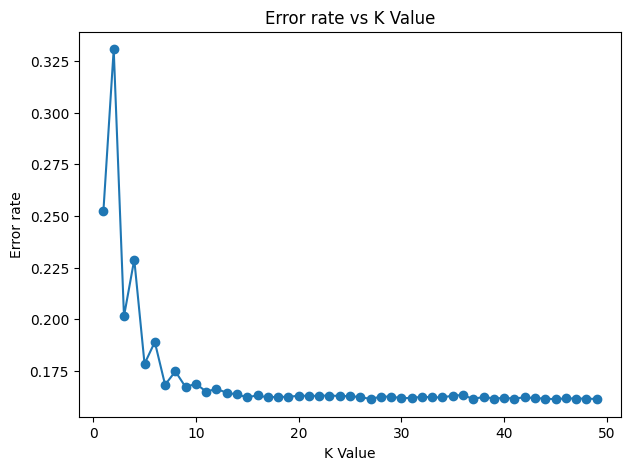

In [ ]:
figure = plt.figure(figsize=(7,5))
plt.plot(np.arange(1,MAX_NEIGHBORS), error_rate, marker='o')
plt.title('Error rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error rate')

## Retrain with new K Value

In [ ]:
CHOSEN_NEIGHBORS = 20
knn = KNeighborsClassifier(n_neighbors=CHOSEN_NEIGHBORS)
knn.fit(X_train, y_train)
k_prediction = knn.predict(X_test)
print(confusion_matrix(y_test, k_prediction))


[[ 126 1441]
 [ 121 7887]]


In [ ]:
print(classification_report(y_test, k_prediction))


              precision    recall  f1-score   support

           0       0.51      0.08      0.14      1567
           1       0.85      0.98      0.91      8008

    accuracy                           0.84      9575
   macro avg       0.68      0.53      0.52      9575
weighted avg       0.79      0.84      0.78      9575



In [ ]:
knn.score(X_test, y_test)

0.8368668407310705

In [ ]:
import pickle
knnPickle = open('model', 'wb')

# source, destination
pickle.dump(knn, knnPickle)

# close the file
knnPickle.close()
